<center>
    
# Milestone for Weeks 11 & 12

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 540 <br>
5/28/2024  

</div>


## Libraries
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [50]:
import sqlite3 
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Part 1. Extraction
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

   - ### Flat File

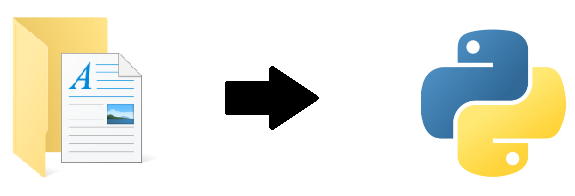

In [2]:
path = "C:\\Users\\Owner\\OneDrive\\Desktop\\DataScience\\2024_Spring_DataPreparation\\"
file = "Master_Theater.xlsx"
file_path = path + file
flat_data = pd.read_excel(file_path)

   - ### Web Scraping

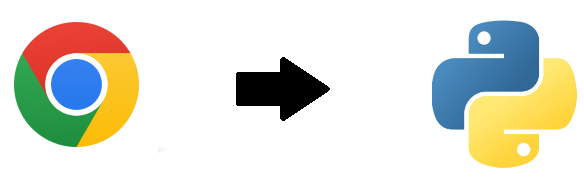

In [3]:
zip_code_list = [
    '97503', '36608', '78744', '78229', '93536', '72019', '75149', '75093', '40509',
    '77840', '75067', '47130', '21046', '89103', '75093', '76116', '84119', '25504',
    '78332', '77040', '76011', '75032', '75093'
]

In [4]:
scraped_data = []

In [5]:
for zip_code in zip_code_list:
    url = f"https://www.zip-codes.com/zip-code/{zip_code}/zip-code-{zip_code}.asp"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        divs = soup.find_all('div', class_='va')
        values = [div.text.strip() for div in divs]
        zip_code_data = {'ZipCode': zip_code}  # Create a dictionary to store the data for this zip code
        categories = ['Population', 'Income', 'Housing', 'Health', 'Business', 'Families', 'Employment', 'Education']
        for category, value in zip(categories, values):
            zip_code_data[category] = value
        scraped_data.append(zip_code_data) # Append the dictionary to the data list
    else:
        print(f"Failed to retrieve data for zip code {zip_code}")

In [6]:
scrape_data = pd.DataFrame(scraped_data)

   - ### API

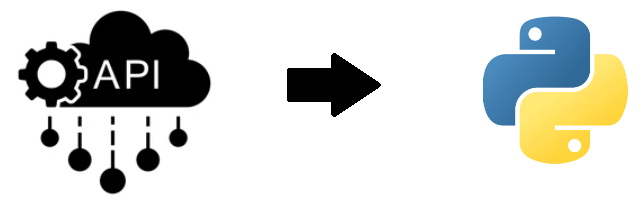

In [7]:
weatherapi = '46bf9bd76e465bac84162b168e06ee6d'

In [8]:
# Data Storage
zipcodes = []
names = []
temps = []
feels_like_temps = []
min_temps = []
max_temps = []
pressures = []
humidities = []
weather_main = []
weather_desc = []
wind_speeds = []

In [9]:
for zip_code in zip_code_list:

# Establish Credentials
    userzipapi = f"http://api.openweathermap.org/geo/1.0/zip?zip={zip_code},US&appid={weatherapi}"
    zipresponse = requests.get(userzipapi)
    zipdata = zipresponse.json()
    latitude, longitude = zipdata['lat'], zipdata['lon']

# Convert zip code to Longitude and Latitude
    temperatureapi = f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={weatherapi}"
    temperatureresponse = requests.get(temperatureapi)
    temperaturedata = temperatureresponse.json()

# Append data to corresponding lists
    zipcodes.append(zip_code)
    names.append(temperaturedata['name'])
    temps.append(temperaturedata['main']['temp'])
    feels_like_temps.append(temperaturedata['main']['feels_like'])
    min_temps.append(temperaturedata['main']['temp_min'])
    max_temps.append(temperaturedata['main']['temp_max'])
    pressures.append(temperaturedata['main']['pressure'])
    humidities.append(temperaturedata['main']['humidity'])
    weather_main.append(temperaturedata['weather'][0]['main'])
    weather_desc.append(temperaturedata['weather'][0]['description'])
    wind_speeds.append(temperaturedata['wind']['speed'])

In [10]:
api_data = pd.DataFrame({
    'Zipcode': zipcodes,
    'City': names,
    'Temperature': temps,
    'Feels_Like': feels_like_temps,
    'Min_Temp': min_temps,
    'Max_Temp': max_temps,
    'Pressure': pressures,
    'Humidity': humidities,
    'Weather_Main': weather_main,
    'Weather_Desc': weather_desc,
    'Wind_Speed': wind_speeds
})

## Part 2. Transformations
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

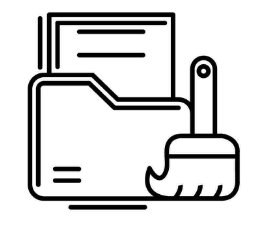

   - ### Flat File Transformations

In [11]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TheaterNumber          821 non-null    int64         
 1   TheaterName            816 non-null    object        
 2   Address1               753 non-null    object        
 3   City                   796 non-null    object        
 4   State                  821 non-null    object        
 5   PostalCode             734 non-null    object        
 6   Country                821 non-null    object        
 7   DateOpened             585 non-null    datetime64[ns]
 8   DateClosed             252 non-null    datetime64[ns]
 9   TotalScreens           821 non-null    int64         
 10  TotalSeats             819 non-null    float64       
 11  AdmissionStateTax      821 non-null    float64       
 12  AdmissionLocalTax      821 non-null    float64       
 13  Admis

In [12]:
# Replace blanks with nulls
flat_data.replace('', np.nan, inplace=True)

In [13]:
# Fill nulls with "Unknown"
columns_to_fill_unknown = ['TheaterName', 'Address1', 'City', 'State']
flat_data[columns_to_fill_unknown] = flat_data[columns_to_fill_unknown].fillna('Unknown')

In [14]:
# Fill nulls with "00000" 
flat_data['PostalCode'].fillna('00000', inplace=True)

In [15]:
# Fill nulls with "9999-99-99" 
columns_to_fill_date = ['DateOpened', 'DateClosed']
flat_data[columns_to_fill_date] = flat_data[columns_to_fill_date].fillna('9999-99-99')

In [16]:
# Fill nulls with 0
columns_to_fill_zero = ['TotalSeats', 'StateVidTax', 'LocalVidTax', 'OtherVidTax', 'StateFilmTax', 
                        'LocalFilmTax', 'OtherFilmTax', 'StateMiscellaneousTax', 
                        'LocalMiscellaneousTax', 'OtherMiscellaneousTax']
flat_data[columns_to_fill_zero] = flat_data[columns_to_fill_zero].fillna(0)

In [17]:
# Standardize
flat_data['PostalCode'] = flat_data['PostalCode'].astype(str).str[:5]

In [18]:
# Replace
flat_data['TotalSeats'] = flat_data['TotalSeats'].replace(0, 300)

# Convert to numeric 
flat_data['TotalSeats'] = pd.to_numeric(flat_data['TotalSeats'])

In [19]:
# Average square footage
average_square_footage = flat_data[(flat_data['SquareFoot'] != 0) | (flat_data['SquareFoot'].notna())]['SquareFoot'].mean()

# Replace 0 and NaN 
flat_data['SquareFoot'] = flat_data['SquareFoot'].replace({0: np.nan, np.nan: average_square_footage})

In [20]:
# Drop faulty Columns
columns_to_drop = ['DateOpened', 'DateClosed']
flat_data = flat_data.drop(columns=columns_to_drop)

In [21]:
# Format Columns to readable Datatype
flat_data['TotalScreens'] = flat_data['TotalScreens'].astype('float64')
flat_data['TheaterNumber'] = flat_data['TheaterNumber'].astype('float64')

In [22]:
flat_data.head()

,TheaterNumber,TheaterName,Address1,City,State,PostalCode,Country,TotalScreens,TotalSeats,AdmissionStateTax,...,StateFilmTax,LocalFilmTax,OtherFilmTax,StateMiscellaneousTax,LocalMiscellaneousTax,OtherMiscellaneousTax,IsRestraurant,SquareFoot,IsIMAX,IsReclined
0,5.0,White City 6,7501 Crater Lake Hwy,White City,OR,97503,USA,6.0,720.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,No,15209.0,No,No
1,84.0,MOVIES 10,3725 AIRPORT BLVD #500,MOBILE,AL,36608,USA,10.0,1968.0,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,No,30408.0,No,No
2,225.0,Tinseltown Austin,5501 S IH 35 Northbound,Austin,TX,78744,USA,17.0,2953.0,6.25,...,0.0,0.0,0.0,0.0,0.0,0.0,No,60578.0,No,No
3,31.0,Cinemark San Antonio 16,The Summit,San Antonio,TX,78229,USA,16.0,1169.0,6.25,...,0.0,0.0,0.0,0.0,0.0,0.0,No,44904.0,No,Yes
4,16.0,MOVIES WEST,2733 WEST AVE L,LANCASTER,CA,93536,USA,6.0,1001.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,No,13800.0,No,No


   - ### Web Scraping Transformations

In [23]:
scrape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZipCode     23 non-null     object
 1   Population  23 non-null     object
 2   Income      23 non-null     object
 3   Housing     23 non-null     object
 4   Health      23 non-null     object
 5   Business    23 non-null     object
 6   Families    23 non-null     object
 7   Employment  23 non-null     object
 8   Education   23 non-null     object
dtypes: object(9)
memory usage: 1.7+ KB


In [24]:
# Remove special characters
scrape_data.replace({',': '', '-': '', '%': '', '$': ''}, regex=True, inplace=True)

In [25]:
scrape_data = scrape_data.fillna(0)
scrape_data = scrape_data.replace({'': 0, '1': 0})

In [26]:
# Convert to integers
scrape_data['ZipCode'] = scrape_data['ZipCode'].astype(int)
scrape_data['Population'] = scrape_data['Population'].astype(int)
scrape_data['Income'] = scrape_data['Income'].str.replace('$', '').str.replace(',', '').astype(int)
scrape_data['Housing'] = scrape_data['Housing'].astype(int)
scrape_data['Business'] = scrape_data['Business'].astype(int)
scrape_data['Families'] = scrape_data['Families'].astype(int)

# Format Health and Employment as percentages
scrape_data['Health'] = scrape_data['Health'].str.rstrip('%').astype(float) / 100
scrape_data['Employment'] = scrape_data['Employment'].str.rstrip('%').astype(float) / 100

In [27]:
# Remove Rows
scrape_data = scrape_data.dropna(how='all')
scrape_data = scrape_data.loc[~(scrape_data==0).all(axis=1)]

In [28]:
scrape_data.head()

,ZipCode,Population,Income,Housing,Health,Business,Families,Employment,Education
0,97503,12349,58964,4217,0.0574,284,4054,0.5388,14.61
1,36608,39782,53217,17805,0.0877,1185,16129,0.5875,40.33
2,78744,51048,65262,18583,0.2054,877,17702,0.7394,25.77
3,78229,33135,41128,18496,0.1841,1245,15984,0.6601,34.09
4,93536,74283,89987,24269,0.0328,684,23431,0.5163,24.81


   - ### API Transformations

In [29]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zipcode       23 non-null     object 
 1   City          23 non-null     object 
 2   Temperature   23 non-null     float64
 3   Feels_Like    23 non-null     float64
 4   Min_Temp      23 non-null     float64
 5   Max_Temp      23 non-null     float64
 6   Pressure      23 non-null     int64  
 7   Humidity      23 non-null     int64  
 8   Weather_Main  23 non-null     object 
 9   Weather_Desc  23 non-null     object 
 10  Wind_Speed    23 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.1+ KB


In [30]:
# Convert Kelvin to Fahrenheit
api_data['Temperature_F'] = (api_data['Temperature'] - 273.15) * 9/5 + 32
api_data['Feels_Like_F'] = (api_data['Feels_Like'] - 273.15) * 9/5 + 32
api_data['Min_Temp_F'] = (api_data['Min_Temp'] - 273.15) * 9/5 + 32
api_data['Max_Temp_F'] = (api_data['Max_Temp'] - 273.15) * 9/5 + 32

In [31]:
# Standardize City Name
api_data['City'] = api_data['City'].str.upper()

In [32]:
# Drop Columns
columns_to_drop = ['Temperature_F', 'Feels_Like_F', 'Min_Temp_F', 'Max_Temp_F']
api_data = api_data.drop(columns=columns_to_drop)

In [33]:
api_data.head()

,Zipcode,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Pressure,Humidity,Weather_Main,Weather_Desc,Wind_Speed
0,97503,JACKSON,291.53,290.49,290.07,293.36,1027,41,Clouds,few clouds,2.06
1,36608,SEVEN HILLS,305.33,307.13,304.65,306.48,1019,47,Clouds,broken clouds,4.12
2,78744,ONION CREEK,305.30,308.83,303.12,307.09,1015,54,Clouds,scattered clouds,2.06
3,78229,BALCONES HEIGHTS,306.23,308.50,303.28,308.83,1015,46,Clouds,few clouds,3.60
4,93536,ANTELOPE ACRES,300.77,299.82,294.33,303.36,1013,26,Clear,clear sky,8.75


## Part 3. Load
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

   - ### SQL Database

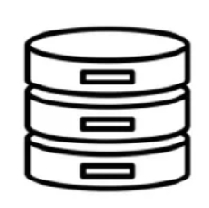

In [34]:
# Connect to Database
conn = sqlite3.connect('my_database.db')

# Cursor
cur = conn.cursor()

In [35]:
# Theater Table
cur.execute('''	
CREATE TABLE IF NOT EXISTS theaters	
	(          	
	TheaterNumber INTEGER,
	TheaterName TEXT,
	Address1 TEXT,
	City TEXT,
	State TEXT,
	PostalCode REAL,
	Country TEXT,
	TotalScreens REAL,
	TotalSeats REAL,
	AdmissionStateTax TEXT,
	AdmissionLocalTax TEXT,
	AdmissionOtherTax TEXT,
	StateConcessionTax TEXT,
	LocalConcessionTax TEXT,
	OtherConcessionTax TEXT,
	StateVidTax TEXT,
	LocalVidTax TEXT,
	OtherVidTax TEXT,
	StateFilmTax TEXT,
	LocalFilmTax TEXT,
	OtherFilmTax TEXT,
	StateMiscellaneousTax TEXT,
	LocalMiscellaneousTax TEXT,
	OtherMiscellaneousTax TEXT,
	IsRestraurant TEXT,
	SquareFoot REAL,
	IsIMAX TEXT,
	IsReclined TEXT
	)
''')

In [36]:
# Theater Demographics
cur.execute('''CREATE TABLE IF NOT EXISTS demographics 
	(
	ZipCode INTEGER,
	Population TEXT,
	Income TEXT,
	Housing TEXT,
	Health TEXT,
	Business TEXT,
	Families TEXT,
	Employment  TEXT,
	Education TEXT
	)
 ''')

In [37]:
# Zip Code Weather
cur.execute('''CREATE TABLE IF NOT EXISTS weather
	(
	Zipcode INTEGER,
	City TEXT,
	Temperature TEXT,
	Feels_Like TEXT,
	Min_Temp REAL,
	Max_Temp REAL,
	Pressure TEXT,
	Humidity TEXT,
	Weather_Main TEXT,
	Weather_Desc TEXT,
	Wind_Speed REAL
	)
''')

   - ### Flat File Load

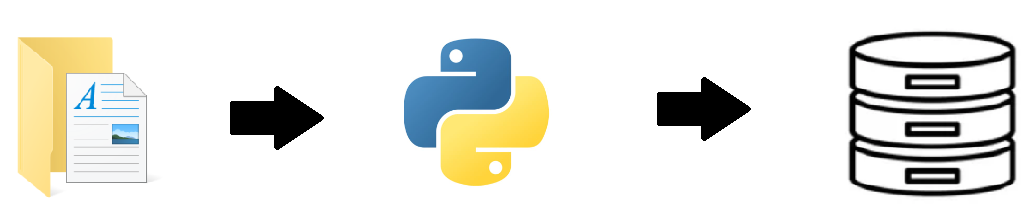

In [38]:
# Insert data
data_tuples = [tuple(x) for x in flat_data.to_records(index=False)]
cur.executemany('''INSERT INTO theaters ('TheaterNumber', 'TheaterName', 'Address1', 'City', 'State',
       'PostalCode', 'Country', 'TotalScreens',
       'TotalSeats', 'AdmissionStateTax', 'AdmissionLocalTax',
       'AdmissionOtherTax', 'StateConcessionTax', 'LocalConcessionTax',
       'OtherConcessionTax', 'StateVidTax', 'LocalVidTax', 'OtherVidTax',
       'StateFilmTax', 'LocalFilmTax', 'OtherFilmTax', 'StateMiscellaneousTax',
       'LocalMiscellaneousTax', 'OtherMiscellaneousTax', 'IsRestraurant',
       'SquareFoot', 'IsIMAX', 'IsReclined') VALUES (
?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?
)''', data_tuples)

# Commit
conn.commit()

   - ### Web Scraping Load

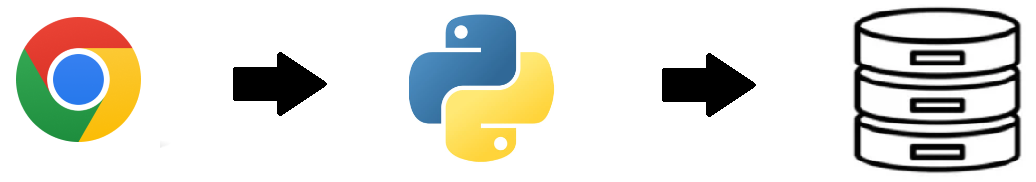

In [39]:
# Insert data
data_tuples = [tuple(x) for x in scrape_data.to_records(index=False)]
cur.executemany('''INSERT INTO demographics ('ZipCode', 'Population', 'Income', 'Housing', 'Health', 'Business',
       'Families', 'Employment', 'Education') VALUES (
?, ?, ?, ?, ?, ?, ?, ?, ?
)''', data_tuples)

# Commit
conn.commit()

   - ### API Load

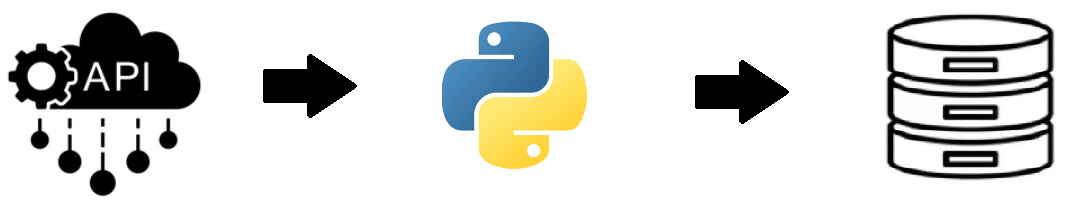

In [40]:
# Insert data
data_tuples = [tuple(x) for x in api_data.to_records(index=False)]
cur.executemany('''INSERT INTO weather ('Zipcode', 'City', 'Temperature', 'Feels_Like', 'Min_Temp', 'Max_Temp',
       'Pressure', 'Humidity', 'Weather_Main', 'Weather_Desc', 'Wind_Speed') VALUES (
?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?
)''', data_tuples)

# Commit
conn.commit()

## Part 4. Report
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

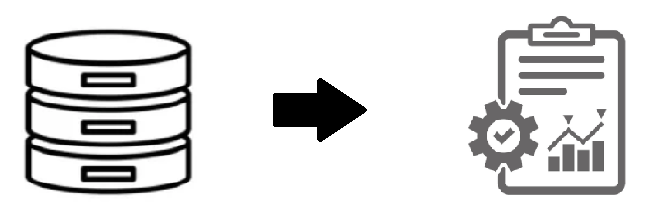

In [46]:
# Report SQL
data = pd.read_sql_query('''
    SELECT
        ts.*
        ,ds.*
        ,wr.*
    FROM
        theaters ts
    INNER JOIN
        demographics ds
        ON ts.PostalCode = ds.zipcode
    INNER JOIN
        weather wr
        ON ts.PostalCode = wr.zipcode
 ''', conn)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TheaterNumber          4104 non-null   int64  
 1   TheaterName            4104 non-null   object 
 2   Address1               4104 non-null   object 
 3   City                   4104 non-null   object 
 4   State                  4104 non-null   object 
 5   PostalCode             4104 non-null   float64
 6   Country                4104 non-null   object 
 7   TotalScreens           4104 non-null   float64
 8   TotalSeats             4104 non-null   float64
 9   AdmissionStateTax      4104 non-null   object 
 10  AdmissionLocalTax      4104 non-null   object 
 11  AdmissionOtherTax      4104 non-null   object 
 12  StateConcessionTax     4104 non-null   object 
 13  LocalConcessionTax     4104 non-null   object 
 14  OtherConcessionTax     4104 non-null   object 
 15  Stat

In [48]:
data.describe()

,TheaterNumber,PostalCode,TotalScreens,TotalSeats,SquareFoot,ZipCode,Zipcode,Min_Temp,Max_Temp,Wind_Speed
count,4104.000000,4104.000000,4104.000000,4104.000000,252.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000
mean,16496.883041,74893.812865,0.883041,381.187135,47973.334903,74893.812865,74893.812865,300.737142,304.580373,1.672061
std,35931.491110,4294.840194,3.218271,387.282801,33423.866345,4294.840194,4294.840194,1.173259,1.103273,0.715379
min,0.000000,21046.000000,0.000000,300.000000,4000.000000,21046.000000,21046.000000,288.230000,292.980000,0.890000
25%,925.000000,75093.000000,0.000000,300.000000,21592.118437,75093.000000,75093.000000,300.800000,304.590000,1.340000
50%,953.000000,75093.000000,0.000000,300.000000,35715.500000,75093.000000,75093.000000,300.830000,304.700000,1.790000
75%,981.000000,75093.000000,0.000000,300.000000,96980.000000,75093.000000,75093.000000,300.830000,304.700000,1.790000
max,99999.000000,97503.000000,22.000000,3846.000000,104620.000000,97503.000000,97503.000000,306.740000,309.130000,9.770000


In [ ]:
# Close the connection
conn.close()

## Part 5. Visuals
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

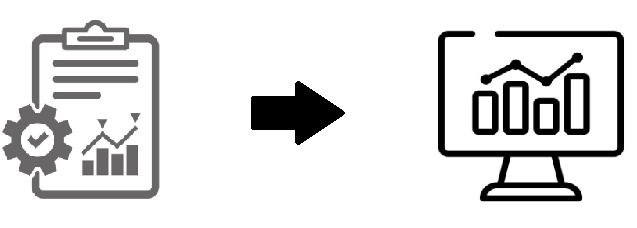

In [56]:
# Convert columns to appropriate data types
data['TotalSeats'] = pd.to_numeric(data['TotalSeats'], errors='coerce')
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce')
data['TotalScreens'] = pd.to_numeric(data['TotalScreens'], errors='coerce')
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')

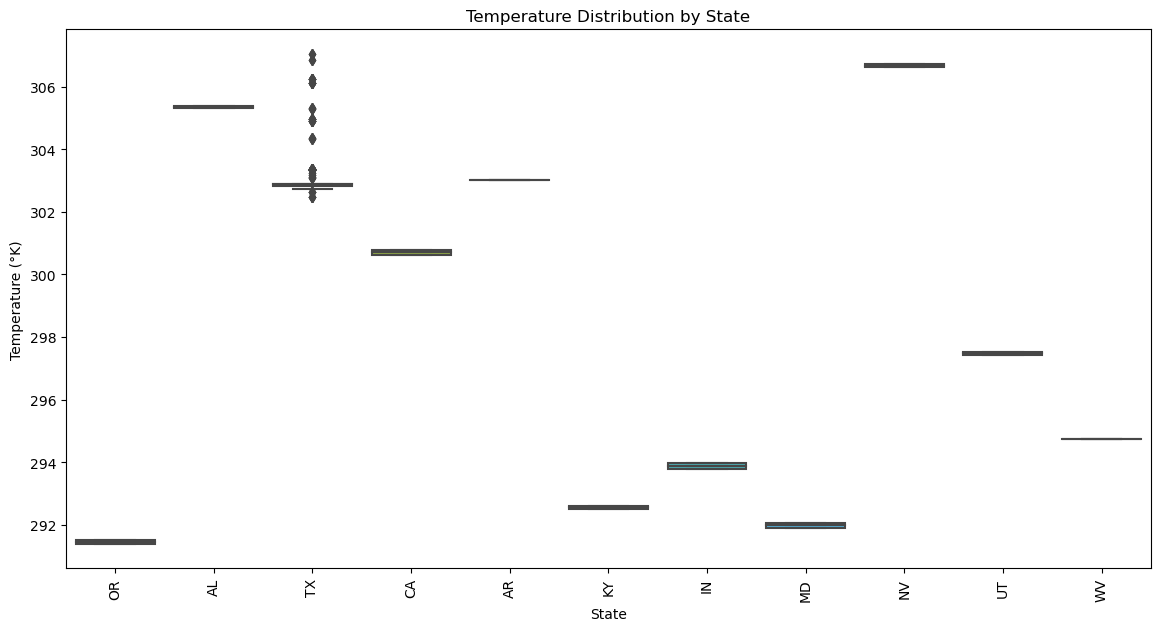

In [63]:
# Visualization 3: Temperature Distribution by State
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='State', y='Temperature')
plt.xticks(rotation=90)
plt.title('Temperature Distribution by State')
plt.xlabel('State')
plt.ylabel('Temperature (°K)')
plt.show()

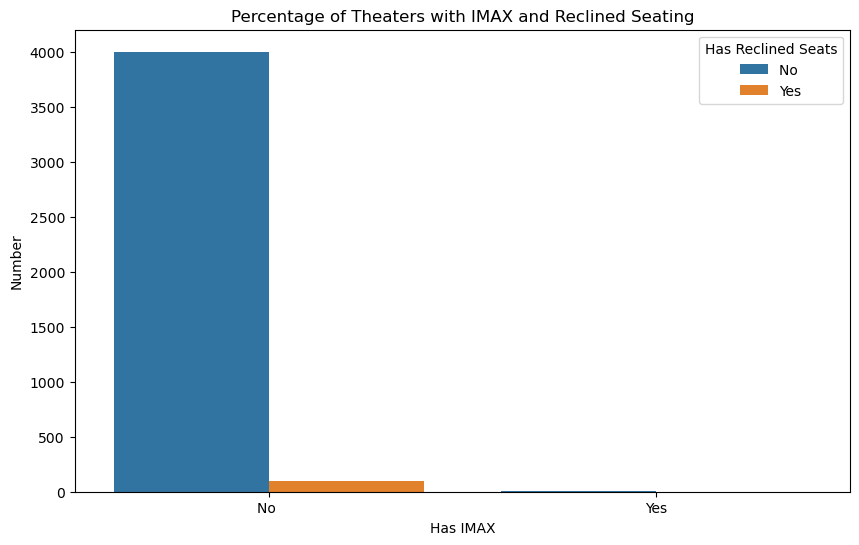

In [64]:
# Visualization 4: Percentage of Theaters with IMAX and Reclined Seating
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='IsIMAX', hue='IsReclined')
plt.title('Percentage of Theaters with IMAX and Reclined Seating')
plt.xlabel('Has IMAX')
plt.ylabel('Number')
plt.legend(title='Has Reclined Seats')
plt.show()

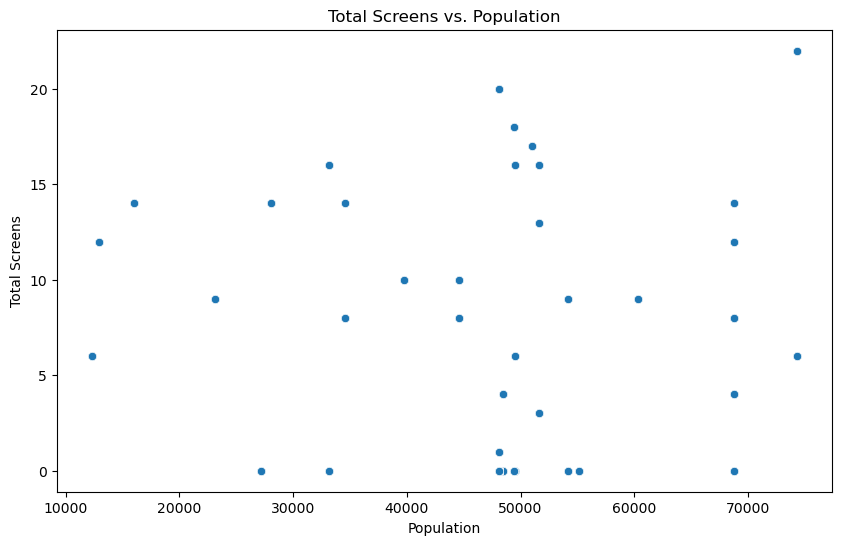

In [55]:
# Visualization 5: Total Screens vs. Population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Population', y='TotalScreens')
plt.title('Total Screens vs. Population')
plt.xlabel('Population')
plt.ylabel('Total Screens')
plt.show()

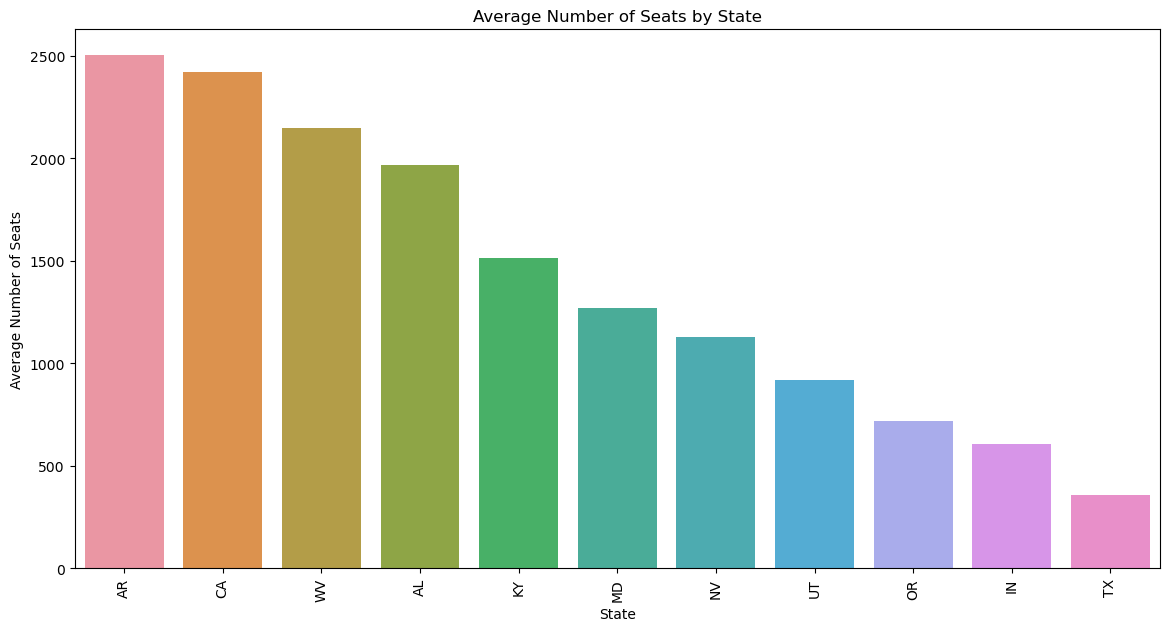

In [58]:
# Visualization 1: Average Number of Seats by State
plt.figure(figsize=(14, 7))
avg_seats_by_state = data.groupby('State')['TotalSeats'].mean().sort_values(ascending=False)
sns.barplot(x=avg_seats_by_state.index, y=avg_seats_by_state.values)
plt.xticks(rotation=90)
plt.title('Average Number of Seats by State')
plt.xlabel('State')
plt.ylabel('Average Number of Seats')
plt.show()

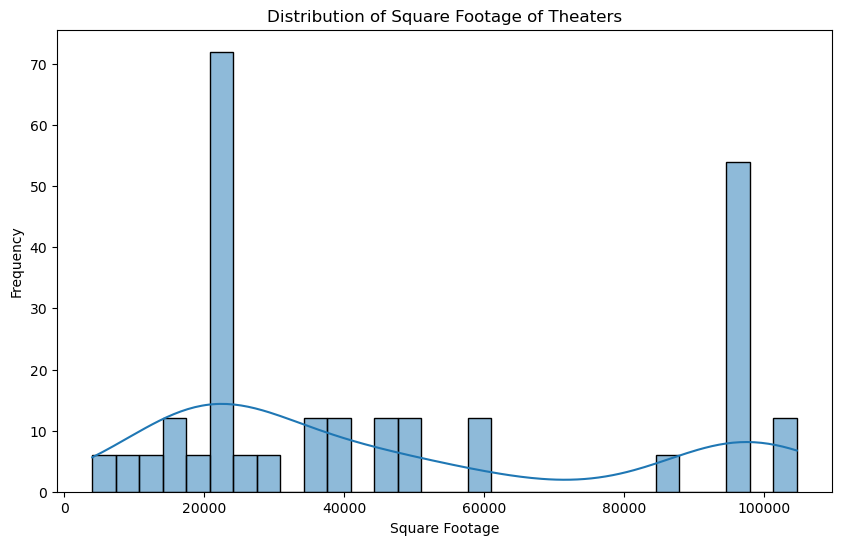

In [59]:
# Visualization 2: Distribution of Square Footage of Theaters
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='SquareFoot', bins=30, kde=True)
plt.title('Distribution of Square Footage of Theaters')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

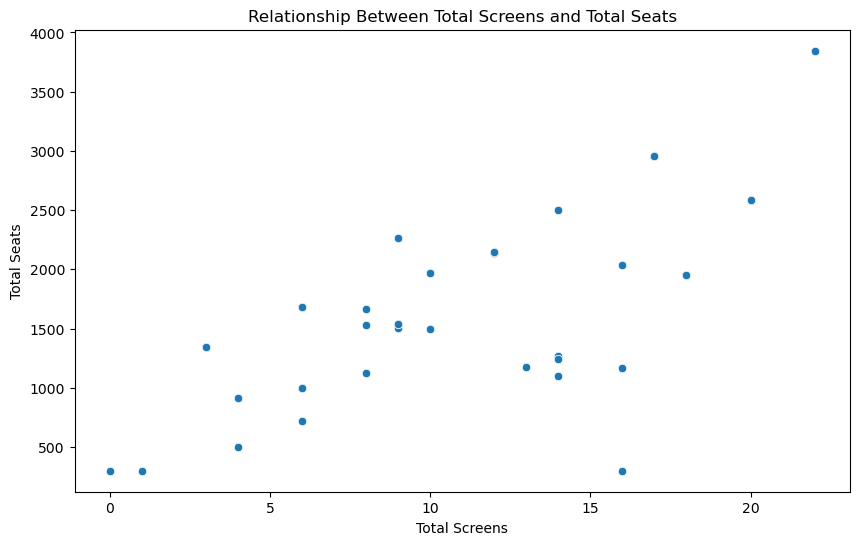

In [60]:
# Visualization 3: Relationship Between Total Screens and Total Seats
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalScreens', y='TotalSeats')
plt.title('Relationship Between Total Screens and Total Seats')
plt.xlabel('Total Screens')
plt.ylabel('Total Seats')
plt.show()

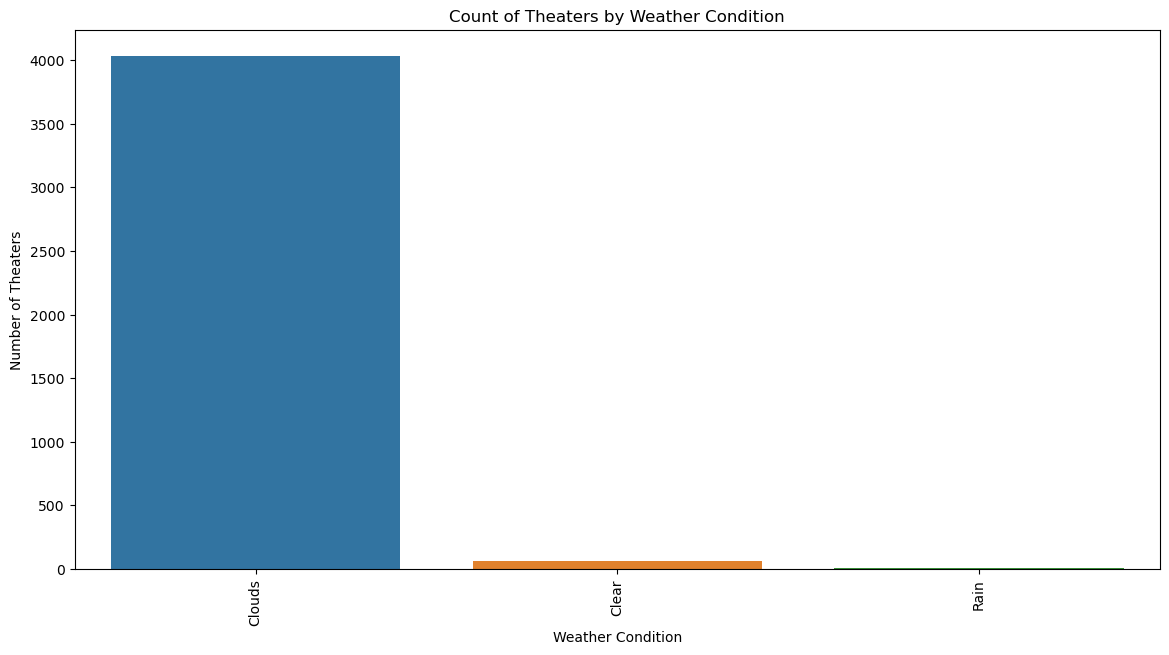

In [61]:
# Visualization 4: Count of Theaters by Weather Condition
plt.figure(figsize=(14, 7))
weather_condition_counts = data['Weather_Main'].value_counts()
sns.barplot(x=weather_condition_counts.index, y=weather_condition_counts.values)
plt.xticks(rotation=90)
plt.title('Count of Theaters by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Theaters')
plt.show()

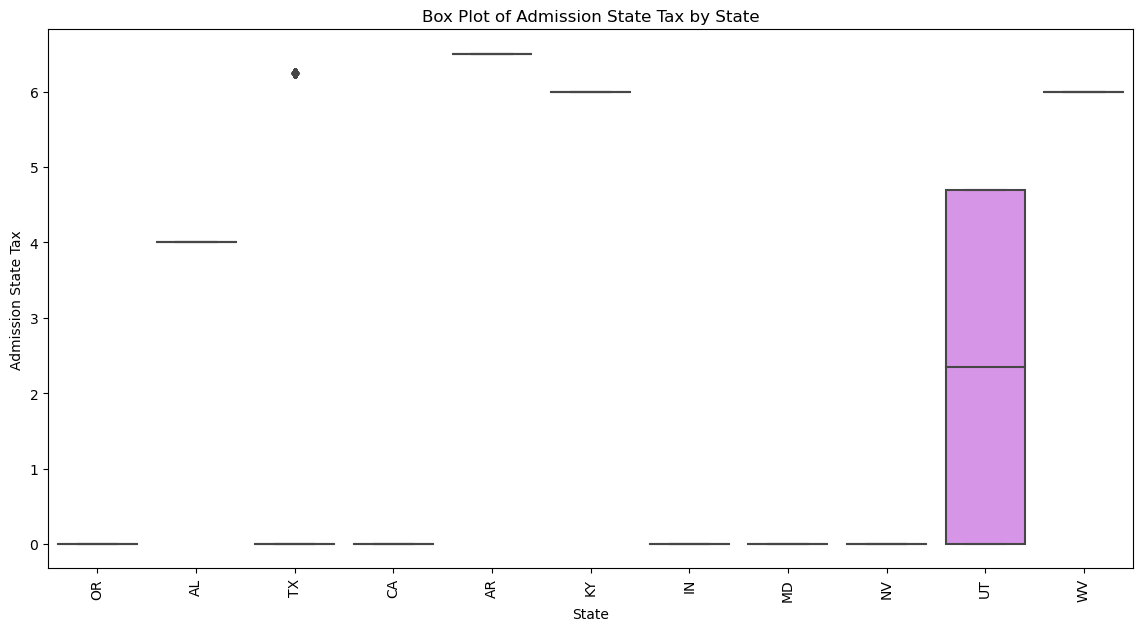

In [62]:
# Visualization 5: Box Plot of Admission State Tax by State
plt.figure(figsize=(14, 7))
data['AdmissionStateTax'] = pd.to_numeric(data['AdmissionStateTax'], errors='coerce')
sns.boxplot(data=data, x='State', y='AdmissionStateTax')
plt.xticks(rotation=90)
plt.title('Box Plot of Admission State Tax by State')
plt.xlabel('State')
plt.ylabel('Admission State Tax')
plt.show()

## Part 6. Summary
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

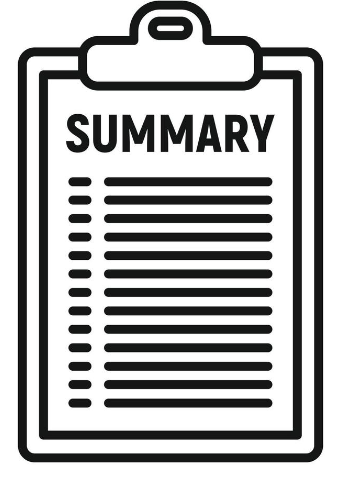

What changes were made to the data?

flat_data <br>
During the data wrangling process for the theater data, several modifications were made to enhance completeness and usability. First, blanks and nulls were filled appropriately based on the column's data and context. For instance, theaters with 0 seats were assigned a minimum feasible value of 300 seats, and missing or zero values for square footage were replaced with the average square footage. Column names were also renamed for clarity and consistency. Additionally, columns that were deemed irrelevant were identified and dropped to streamline the dataset.<br>

scrape_data<br>
To ensure the scraped data was clean and consistent, several changes were implemented. Missing values were filled with 0, and rows containing all 0 values or NaN values were removed. Columns were renamed to follow a consistent naming convention. Certain columns were converted to integer types, and percentages in specific columns were formatted appropriately. Special characters in certain columns were also replaced to maintain consistency.<br>

api_data<br>
To prepare the API data for analysis, a series of transformations were applied. Temperatures were converted from Kelvin to Fahrenheit for better readability. Dummy columns were created to facilitate qualitative analysis. City names were standardized to uppercase to ensure uniformity. Column names were renamed to improve readability and clarity. Lastly, unnecessary columns were dropped to enhance processing speed.<br><br>


Are there any legal or regulatory guidelines for your data or project topic?

flat_data <br>
Not any legal or regulatory guidlines for this particular project. To be on the safe side the data ewas scambeled before using.<br>

scrape_data<br>
There may be licensing agreements or terms of service that could of been violated.<br>

api_data<br>
No, Everything was done according to the regulations established by the owners documentation.<br><br>

What risks could be created based on the transformations done?

flat_data <br>
Risks associated with these transformations include potential biases introduced by assumptions made during data cleaning and transformation.

scrape_data<br>
loss of information or introduction of errors during cleaning or formatting.


api_data<br>
Inturpretation goes down/ ease of understanding.

Did you make any assumptions in cleaning/transforming the data?

flat_data <br>
Privacy concerns were handled at the beginning with removing individual identifing attributes.<br>

scrape_data<br>
Assuming that missing values in certain columns can be safely filled with 0.<br>

api_data<br>
That the data types were all standardized and that numerical values were all the same.<br><br>

How was your data sourced / verified for credibility?

flat_data <br>
Yes, the data used was tride and true found in its source system. Multiple points of contact confirmed the integrity<br>

scrape_data<br>
No, This was one website and I noticed some of the answers being off. I know the population in Frisco is much higher than stated.<br>

api_data<br>
A quick google weather search confirmed that data.<br><br>

Was your data acquired in an ethical way?

flat_data <br>
Yes, proper premissions were granted.<br>

scrape_data<br>
If there was violations of the terms and conditions it would be unfriendly but what I can gain from my eyes I should be able to do so with code without raising flags.<br>

api_data<br>
Yes, I followed the regulations established by the owners documentation.<br><br>

How would you mitigate any of the ethical implications you have identified?

flat_data <br>
Explaing the changes done clearly help mitigate any risk involved with using the data. Regular audits and reviews can also help uphold ethical standards throughout the data wrangling process.<br>

scrape_data<br>
Transparency in data processing and documentation of data sources and methodologies.<br>

api_data<br>
By documenting and clearly explaining the steps taken.<br><br>